# PART 1

In [ ]:
!pip install gymnasium matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing libaries
from google.colab import widgets
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

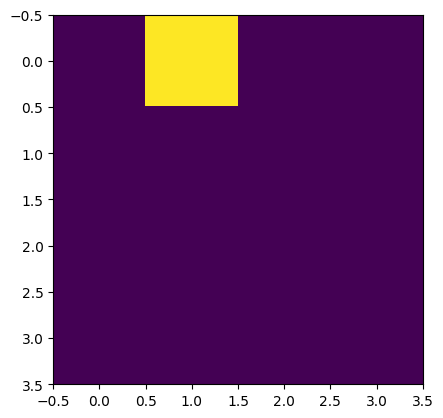

In [ ]:
# visulaizationdemo of gridworld
output_grid = widgets.Grid(1, 1)
for _ in range(5):
  grid = np.zeros((4, 4))
  grid[np.random.randint(3), np.random.randint(3)] = 1

  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
  time.sleep(1)

In [ ]:
class GridEnvironment(gym.Env):
  def __init__(self):
    self.observation_space = spaces.Discrete(16)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 100
    self.timestep = 0
    self.agent_pos = [0, 0]
    self.start_pos = [0 , 0]
    self.goal_pos = [3, 3]
    self.obstacle_state = [1,2]
    self.state = np.zeros((4,4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    self.state[tuple(self.obstacle_state)] = -0.5
  def reset(self):
    self.agent_pos = [0, 0]
    self.state = np.zeros((4,4))
    self.obstacle_state = [1,2]
    self.timestep = 0
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    self.state[tuple(self.obstacle_state)] = -0.5
    observation = self.state.flatten()
    info = {}
    obs = self.agent_pos[0] * 4 + self.agent_pos[1]
    return obs, info
  def step(self,action):
    if action == 0:
      self.agent_pos[0] += 1
    if action == 1:
      self.agent_pos[0] -= 1
    if action == 2:
      self.agent_pos[1] += 1
    if action == 3:
      self.agent_pos[1] -= 1
    self.agent_pos = np.clip(self.agent_pos, 0, 3)
    self.state = np.zeros((4,4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    self.state[tuple(self.obstacle_state)] = -0.5
    observation = self.state.flatten()
    reward = 0
    if np.array_equal(self.agent_pos, self.goal_pos):
      reward = 10
    if np.array_equal(self.agent_pos,(3,0)):
      reward = 3
    if np.array_equal(self.agent_pos, self.obstacle_state):
      reward = -5
    if np.array_equal(self.agent_pos, (0,2)):
      reward = 1
    self.timestep += 1
    terminated = True if self.timestep >= self.max_timesteps else False
    truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 2)) else False
    info = {}
    obs = self.agent_pos[0]*4 + self.agent_pos[1]
    return obs, reward, terminated, truncated, info
  def render(self):
    plt.imshow(self.state)
    goal_pos = np.array(self.goal_pos)
    agent_pos = np.array(self.agent_pos)
    obs_pos = np.array(self.obstacle_state)
    r1 = np.array((3,0))
    r2 = np.array((0,2))
    plt.text(goal_pos[1], goal_pos[0], 'Goal state', color='Blue',
             ha='center', va='center', fontsize=16)
    plt.text(agent_pos[1], agent_pos[0], 'Agent', color='Blue',
             ha='center', va='center', fontsize=16)
    plt.text(obs_pos[1], obs_pos[0], 'Obstacle(-5)', color='Blue',
             ha='center', va='center', fontsize=12)
    plt.text(r1[1], r1[0], '+3', color='Blue',
             ha='center', va='center', fontsize=12)
    plt.text(r2[1], r2[0], '+1', color='Blue',
             ha='center', va='center', fontsize=12)
    plt.show()
  

In [ ]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)

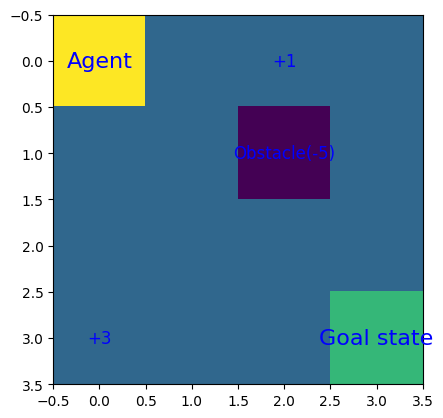

In [ ]:
# visulaization
env = GridEnvironment()
env.reset()
env.render()

State: 0 Action: LEFT Reward: 0


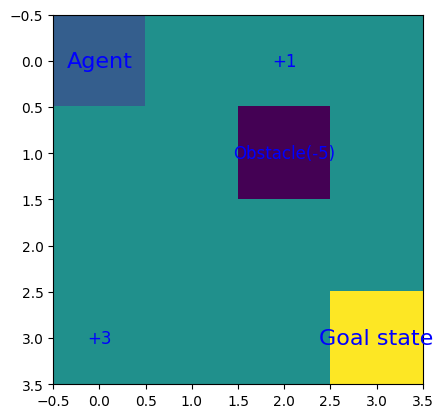

State: 1 Action: RIGHT Reward: 0


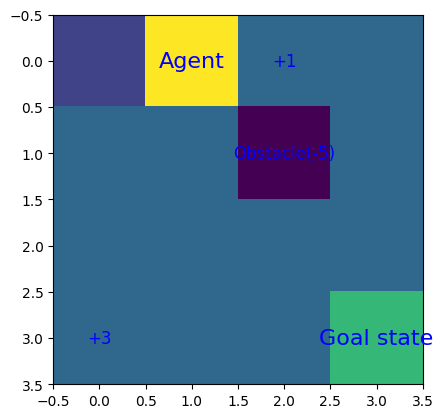

State: 1 Action: UP Reward: 0


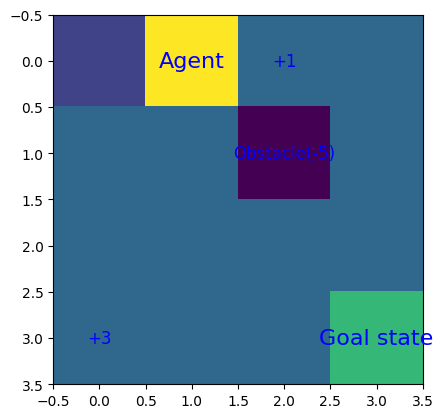

State: 0 Action: LEFT Reward: 0


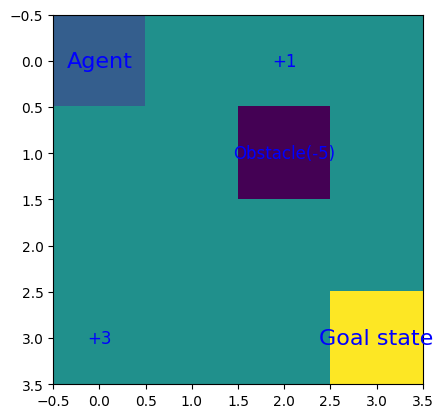

State: 1 Action: RIGHT Reward: 0


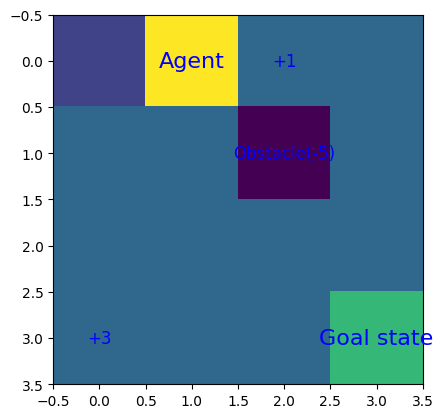

State: 1 Action: UP Reward: 0


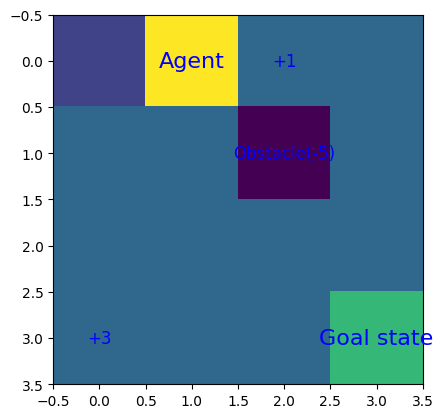

State: 2 Action: RIGHT Reward: 1


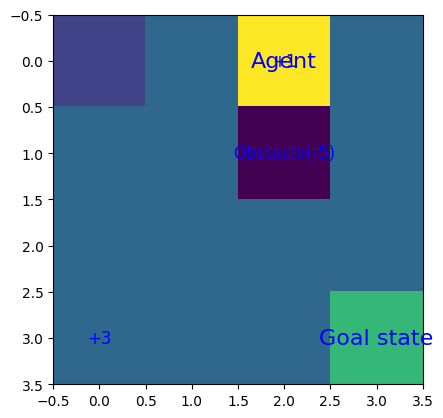

State: 1 Action: LEFT Reward: 0


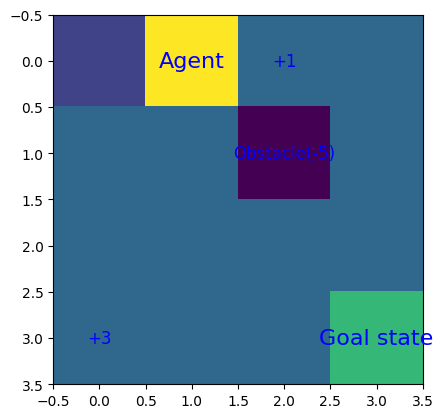

State: 0 Action: LEFT Reward: 0


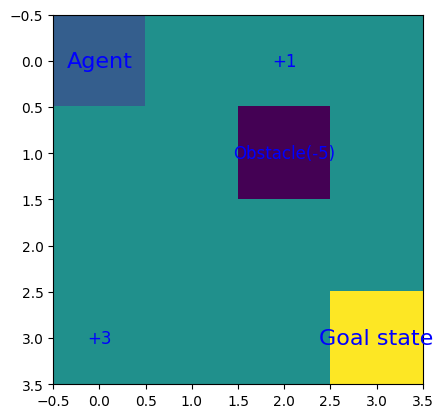

State: 0 Action: LEFT Reward: 0


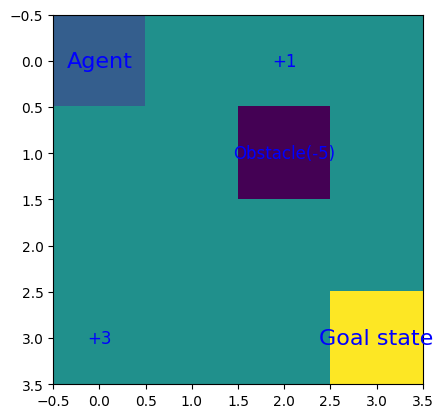

In [ ]:
env = GridEnvironment()
agent = RandomAgent(env)
o = env.reset()
i = 1
while i <=10:
  act = agent.step(o)
  o,reward,terminated,truncated,info = env.step(act)
  possible_actions = {0: 'DOWN', 1: 'UP', 2: 'RIGHT', 3:'LEFT'}
  print("State:", o, "Action:", possible_actions[act], "Reward:", reward)
  env.render()
  plt.show()
  if reward == 10:
    print("Goal Reached")
    break
  if terminated:
    print("Reached Maximum steps")
    break
  i = i+1
  

# PART 2

In [ ]:
class RandomAgent():
  def __init__(self,env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
  
  def action(self,state,epsilon,q):
    randomValue = np.random.rand()
    return np.random.choice(self.action_space.n) if randomValue < epsilon else np.argmax(q[state])

In [ ]:
# SARSA Algorithm
def sarsa(q,observation,act,learning,reward,discount,state,action):
  return q[observation,act] + learning * (reward+(discount * q[state,action]) - q[observation,act])

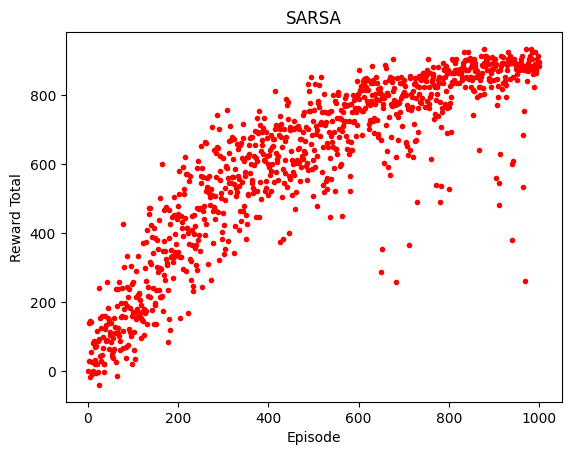

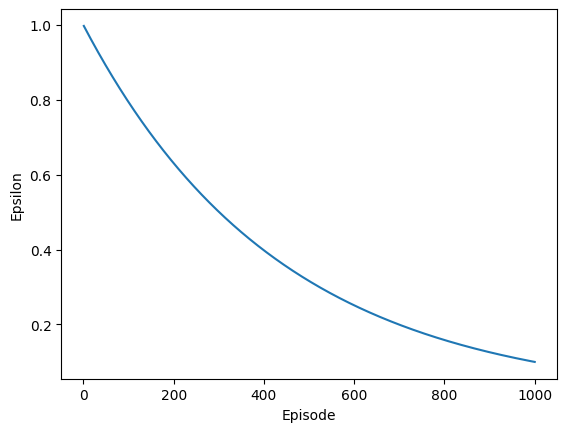

In [ ]:
# hyperparameter tuning - 1
epsilon_rate = 1
discount = 0.6
epsilon_min_rate = 0.1
learning = 0.1
episodes = 1000
rewardlist = []
episodeslist = []
epsilonslist = []
decay_epsilon = (epsilon_min_rate/epsilon_rate)**(1/episodes)
q = np.zeros((16,4))
environment = GridEnvironment()
agent = RandomAgent(environment)
i = 1
while i <= episodes:
  rewardcount = 0
  observation , info = environment.reset()
  while True:
    act = agent.action(observation,epsilon_rate,q)
    state,reward,terminated,truncated,info = environment.step(act)
    if terminated:
      break
    action = agent.action(state,epsilon_rate,q)
    rewardcount += reward
    q[observation,act] = sarsa(q,observation,act,learning,reward,discount,state,action)
    observation = state
  episodeslist.append(i)
  rewardlist.append(rewardcount)
  epsilon_rate = max(epsilon_rate*decay_epsilon,epsilon_min_rate)
  epsilonslist.append(epsilon_rate)
  i = i+1
plt.plot(episodeslist,rewardlist,'r.')
plt.title("SARSA")
plt.xlabel("Episode")
plt.ylabel("Reward Total")
plt.show()
plt.plot(episodeslist,epsilonslist)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.show()

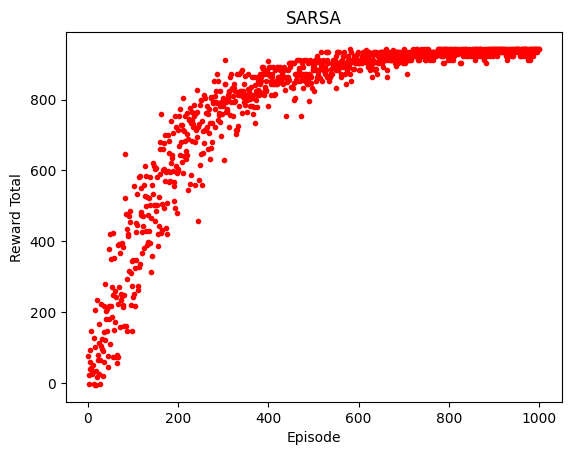

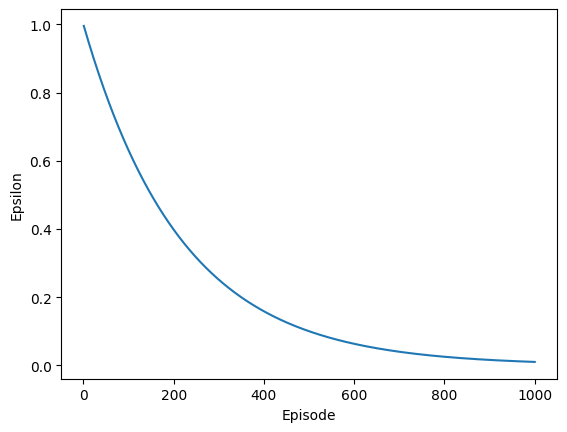

In [ ]:
# hyperparameter tuning - 2
epsilon_rate = 1
discount = 0.7
epsilon_min_rate = 0.01
learning = 0.1
episodes = 1000
rewardlist = []
episodeslist = []
epsilonslist = []
decay_epsilon = (epsilon_min_rate/epsilon_rate)**(1/episodes)
q = np.zeros((16,4))
environment = GridEnvironment()
agent = RandomAgent(environment)
i = 1
while i <= episodes:
  rewardcount = 0
  observation , info = environment.reset()
  while True:
    act = agent.action(observation,epsilon_rate,q)
    state,reward,terminated,truncated,info = environment.step(act)
    if terminated:
      break
    action = agent.action(state,epsilon_rate,q)
    rewardcount += reward
    q[observation,act] = sarsa(q,observation,act,learning,reward,discount,state,action)
    observation = state
  episodeslist.append(i)
  rewardlist.append(rewardcount)
  epsilon_rate = max(epsilon_rate*decay_epsilon,epsilon_min_rate)
  epsilonslist.append(epsilon_rate)
  i = i+1
plt.plot(episodeslist,rewardlist,'r.')
plt.title("SARSA")
plt.xlabel("Episode")
plt.ylabel("Reward Total")
plt.show()
plt.plot(episodeslist,epsilonslist)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.show()

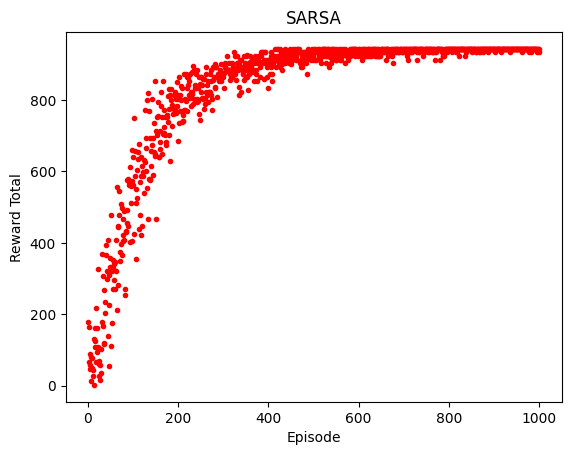

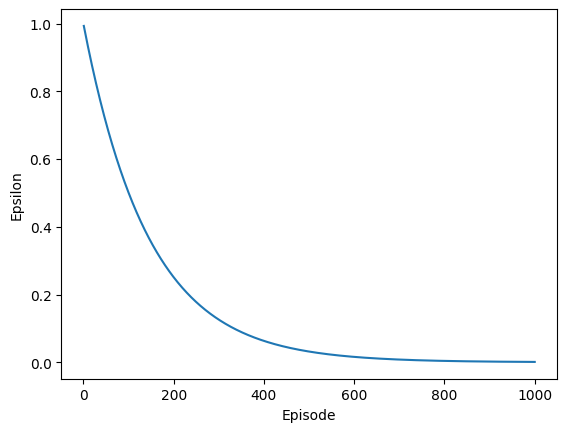

In [ ]:
# hyperparameter tuning - 3
epsilon_rate = 1
discount = 0.8
epsilon_min_rate = 0.001
learning = 0.1
episodes = 1000
rewardlist = []
episodeslist = []
epsilonslist = []
decay_epsilon = (epsilon_min_rate/epsilon_rate)**(1/episodes)
q = np.zeros((16,4))
environment = GridEnvironment()
agent = RandomAgent(environment)
i = 1
while i <= episodes:
  rewardcount = 0
  observation , info = environment.reset()
  while True:
    act = agent.action(observation,epsilon_rate,q)
    state,reward,terminated,truncated,info = environment.step(act)
    if terminated:
      break
    action = agent.action(state,epsilon_rate,q)
    rewardcount += reward
    q[observation,act] = sarsa(q,observation,act,learning,reward,discount,state,action)
    observation = state
  episodeslist.append(i)
  rewardlist.append(rewardcount)
  epsilon_rate = max(epsilon_rate*decay_epsilon,epsilon_min_rate)
  epsilonslist.append(epsilon_rate)
  i = i+1
plt.plot(episodeslist,rewardlist,'r.')
plt.title("SARSA")
plt.xlabel("Episode")
plt.ylabel("Reward Total")
plt.show()
plt.plot(episodeslist,epsilonslist)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.show()

# PART 3

In [ ]:
# Q learning algorithm
def qlearning(q,observation,act,learning,reward,discount,state,action):
  return q[observation,act] + learning * (reward+(discount * np.max(q[state,action])) - q[observation,act])

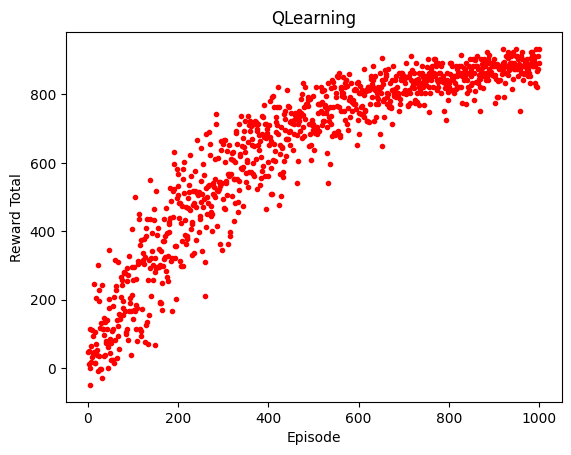

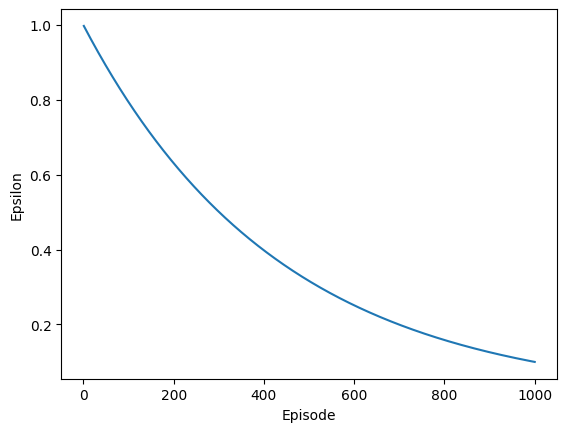

In [ ]:
# hyperparameter tuning - 1
epsilon_rate = 1
discount = 0.6
epsilon_min_rate = 0.1
learning = 0.1
episodes = 1000
rewardlist = []
episodeslist = []
epsilonslist = []
decay_epsilon = (epsilon_min_rate/epsilon_rate)**(1/episodes)
q = np.zeros((16,4))
environment = GridEnvironment()
agent = RandomAgent(environment)
i = 1
while i <= episodes:
  rewardcount = 0
  observation , info = environment.reset()
  while True:
    act = agent.action(observation,epsilon_rate,q)
    state,reward,terminated,truncated,info = environment.step(act)
    if terminated:
      break
    action = np.argmax(q[state])
    rewardcount += reward
    q[observation,act] = qlearning(q,observation,act,learning,reward,discount,state,action)
    observation = state
  episodeslist.append(i)
  rewardlist.append(rewardcount)
  epsilon_rate = max(epsilon_rate*decay_epsilon,epsilon_min_rate)
  epsilonslist.append(epsilon_rate)
  i = i+1
plt.plot(episodeslist,rewardlist,'r.')
plt.title("QLearning")
plt.xlabel("Episode")
plt.ylabel("Reward Total")
plt.show()
plt.plot(episodeslist,epsilonslist)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.show()

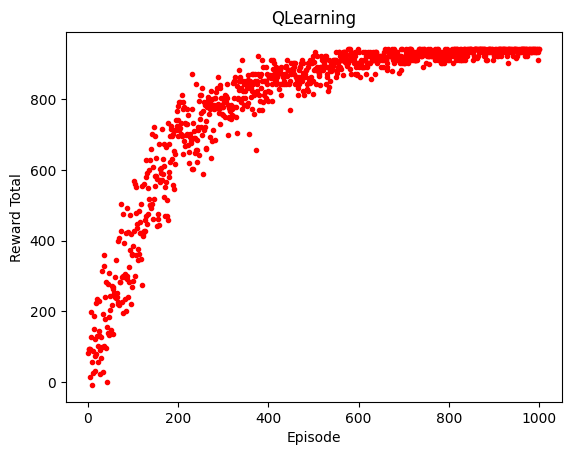

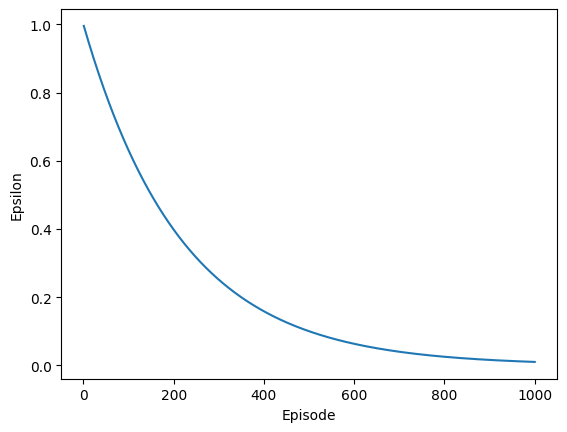

In [ ]:
# hyperparameter tuning - 2
epsilon_rate = 1
discount = 0.7
epsilon_min_rate = 0.01
learning = 0.1
episodes = 1000
rewardlist = []
episodeslist = []
epsilonslist = []
decay_epsilon = (epsilon_min_rate/epsilon_rate)**(1/episodes)
q = np.zeros((16,4))
environment = GridEnvironment()
agent = RandomAgent(environment)
i = 1
while i <= episodes:
  rewardcount = 0
  observation , info = environment.reset()
  while True:
    act = agent.action(observation,epsilon_rate,q)
    state,reward,terminated,truncated,info = environment.step(act)
    if terminated:
      break
    action = np.argmax(q[state])
    rewardcount += reward
    q[observation,act] = qlearning(q,observation,act,learning,reward,discount,state,action)
    observation = state
  episodeslist.append(i)
  rewardlist.append(rewardcount)
  epsilon_rate = max(epsilon_rate*decay_epsilon,epsilon_min_rate)
  epsilonslist.append(epsilon_rate)
  i = i+1
plt.plot(episodeslist,rewardlist,'r.')
plt.title("QLearning")
plt.xlabel("Episode")
plt.ylabel("Reward Total")
plt.show()
plt.plot(episodeslist,epsilonslist)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.show()

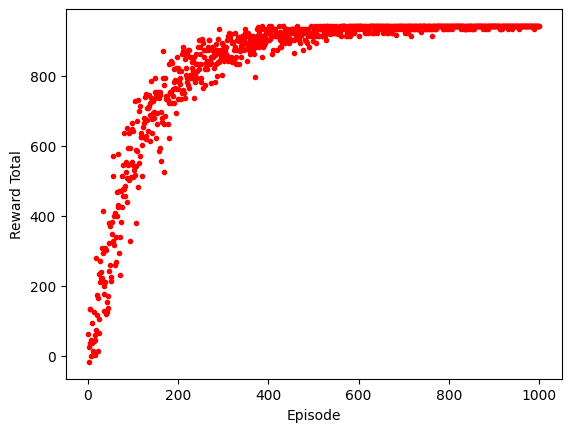

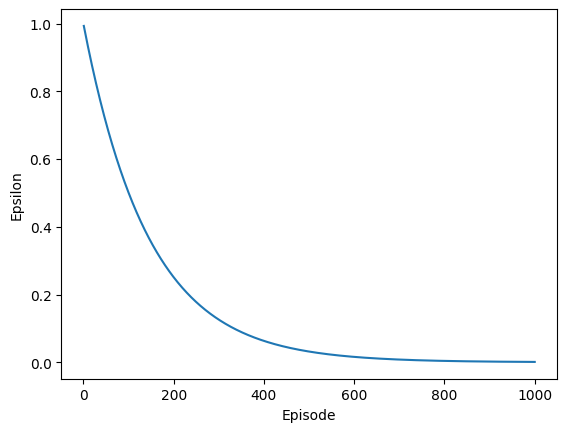

In [ ]:
# hyperparameter tuning - 3
epsilon_rate = 1
discount = 0.8
epsilon_min_rate = 0.001
learning = 0.1
episodes = 1000
rewardlist = []
episodeslist = []
epsilonslist = []
decay_epsilon = (epsilon_min_rate/epsilon_rate)**(1/episodes)
q = np.zeros((16,4))
environment = GridEnvironment()
agent = RandomAgent(environment)
i = 1
while i <= episodes:
  rewardcount = 0
  observation , info = environment.reset()
  while True:
    act = agent.action(observation,epsilon_rate,q)
    state,reward,terminated,truncated,info = environment.step(act)
    if terminated:
      break
    action = np.argmax(q[state])
    rewardcount += reward
    q[observation,act] = qlearning(q,observation,act,learning,reward,discount,state,action)
    observation = state
  episodeslist.append(i)
  rewardlist.append(rewardcount)
  epsilon_rate = max(epsilon_rate*decay_epsilon,epsilon_min_rate)
  epsilonslist.append(epsilon_rate)
  i = i+1
plt.plot(episodeslist,rewardlist,'r.')
plt.title("QLearning")
plt.xlabel("Episode")
plt.ylabel("Reward Total")
plt.show()
plt.plot(episodeslist,epsilonslist)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.show()